In [1]:

import numpy as np
import csv
from numpy import savetxt
import matplotlib.pyplot as plt 

In [3]:
#  visulize images
def visualImg(filename):
    with open(filename) as file:
        data = csv.reader(file)    # open the file and store in data      
        next(data) # skip header
        next(data) # skip header
        next(data) # skip header
        next(data) # skip header
        array = []
        img = []
        dimension = []
        counts = 0
        for row in data:
            if row[0] != "% Data":
                array.append(row)   # append each row of the image into a long vector in img 
                counts = counts + 1
                rowlength = len(row)
            else:
                dimension.append([rowlength, counts])
                counts = 0
                continue   
    mat = np.asarray(array, dtype=np.float32)    # convert to numpy array
    mat2 = np.nan_to_num(mat)  # change the nan to 0.0
    return mat2


c:\users\zhuof\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()


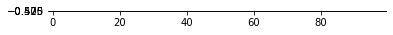

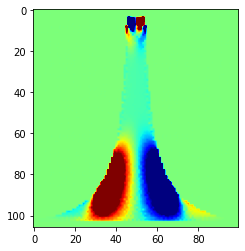

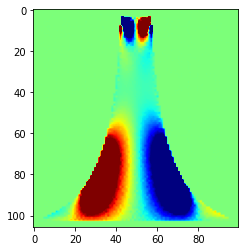

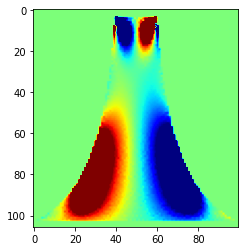

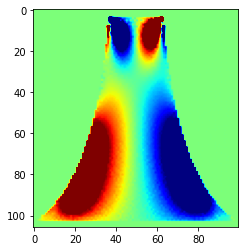

In [4]:

filename ='Data\A_BF.csv'
BMF = visualImg(filename)
imgW = 100;
imgL = 106;
numofImg = len(BMF)/imgL
num = 0
for i in range(num,100,20):
    arrayData = BMF[((i-1)*imgL):(i*imgL),:]                    
    plt.figure()    
    plt.imshow(arrayData, cmap='jet', vmin= -0.1, vmax= 0.1)

In [ ]:
# convert csv data to 2D matrix, flatten 2D image to 1 by n vector
def csv2Mat(filename):
    with open(filename) as file:
        data = csv.reader(file)    # open the file and store in data      
    #     row_count = sum(1 for row in data)
    #     print(row_count)
        next(data) # skip header
        next(data) # skip header
        next(data) # skip header
        next(data) # skip header
        array = []
        img = []
        for row in data:
            if row[0] != "% Data":
                img = img + row   # append each row of the image into a long vector in img          
            else:
                array.append(img)    # append each img as a row of the array
                img = []
        array.append(img)
    mat = np.asarray(array, dtype=np.float32)    # convert to numpy array
    mat2 = np.nan_to_num(mat)  # change the nan to 0.0
    return mat2

In [3]:
Geometry = csv2Mat("dataset/Geometry.csv")
BMF = csv2Mat("dataset/BF.csv")

In [4]:

print(len(Geometry))
print(len(Geometry[0]))
print(len(BMF))
print(len(BMF[0]))

1000
10600
1000
10600


In [5]:
combinedData = np.concatenate((Geometry, BMF), axis = 1)
print(len(combinedData))
print(len(combinedData[0]))

1000
21200


In [14]:
savetxt('data0321.csv', combinedData, delimiter=',', fmt='%2.3f')

In [82]:
with open('data0321.csv') as file:
    data = csv.reader(file)    # open the file and store in data      